In [1]:
%load_ext lab_black

In [2]:
import mglearn
import matplotlib.pyplot as plt
import pandas as pd

citibike = mglearn.datasets.load_citibike()
print("Citi Bike data:\n{}".format(citibike.head()))

Citi Bike data:
starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


/Users/keunbae/code/introduction_to_ml_with_python/mglearn/datasets.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_resampled = data_starttime.resample("3h").sum().fillna(0)


Text(0, 0.5, 'Rentals')

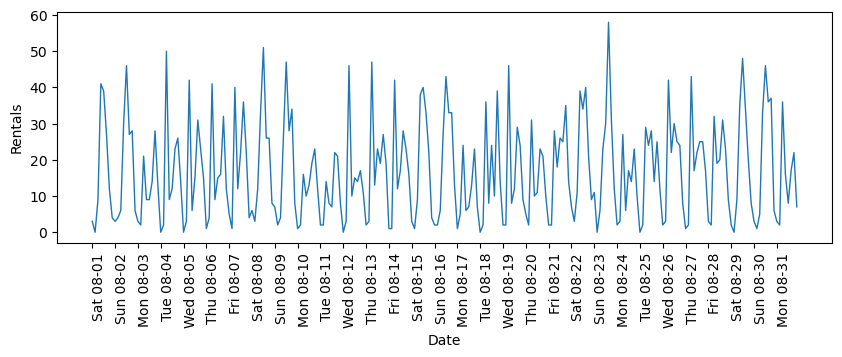

In [3]:
plt.figure(figsize=(10, 3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(), freq="D")
plt.xticks(xticks, xticks.strftime("%a %m-%d"), rotation=90, ha="left")
plt.plot(citibike, linewidth=1)
plt.xlabel("Date")
plt.ylabel("Rentals")

In [4]:
y = citibike.values
# convert the time to POSIX time using "%s"
X = citibike.index.strftime("%s").astype("int").values.reshape(-1, 1)

In [5]:
import matplotlib.pyplot as plt
import numpy as np

n_train = 184


def eval_on_features(features, target, regressor):
    X_train, X_test = features[:n_train], features[n_train:]
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print("Test-set R^2: {:.2f}".format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10, 3))
    plt.xticks(range(0, len(X), 8), xticks.strftime("%a %m-%d"), rotation=90, ha="left")
    plt.plot(range(n_train), y_train, label="train")
    plt.plot(range(n_train, n_train + len(y_test)), y_test, label="test")
    plt.plot(range(n_train), y_pred_train, "--", label="prediction train")
    plt.plot(
        range(n_train, n_train + len(y_test)), y_pred, "--", label="prediction test"
    )
    plt.legend(loc="best")
    plt.xlabel("Date")
    plt.ylabel("Rentals")

Test-set R^2: -0.04


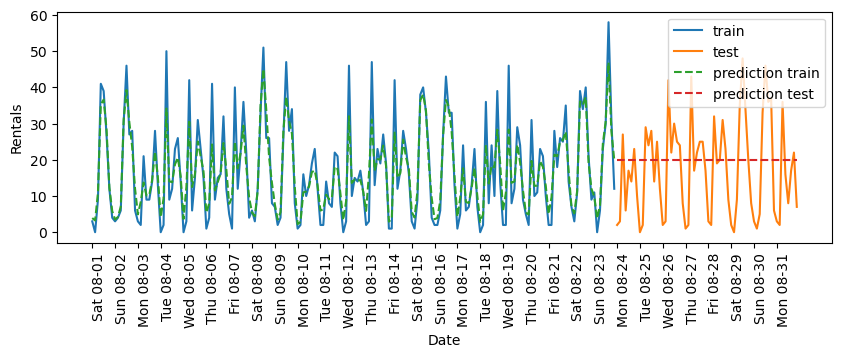

In [6]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
eval_on_features(X, y, regressor)

Test-set R^2: 0.60


array([[ 0],
       [ 3],
       [ 6],
       [ 9],
       [12],
       [15],
       [18],
       [21],
       [ 0],
       [ 3]])

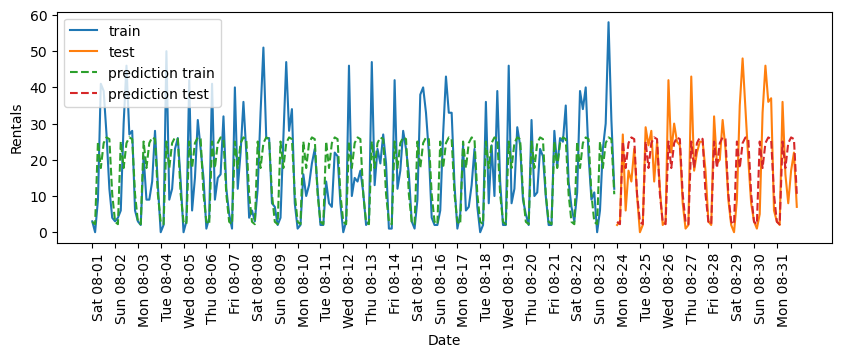

In [7]:
X_hour = citibike.index.hour.values.reshape(-1, 1)
eval_on_features(X_hour, y, regressor)
X_hour[:10]

Test-set R^2: 0.84


array([[ 5,  0],
       [ 5,  3],
       [ 5,  6],
       [ 5,  9],
       [ 5, 12]])

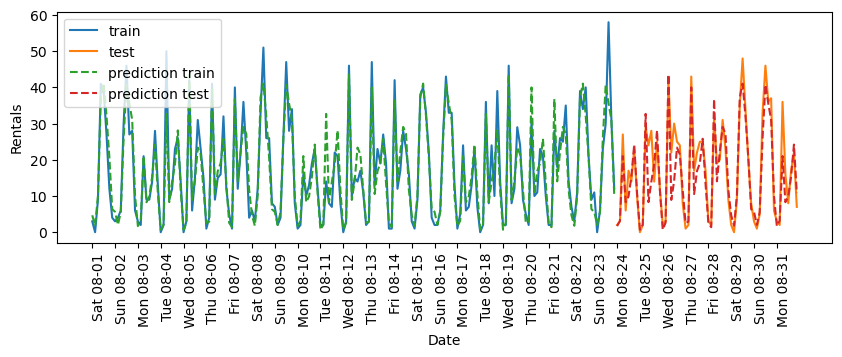

In [8]:
X_hour_week = np.hstack(
    [
        citibike.index.dayofweek.values.reshape(-1, 1),
        citibike.index.hour.values.reshape(-1, 1),
    ]
)
eval_on_features(X_hour_week, y, regressor)
X_hour_week[:5]

Test-set R^2: 0.13


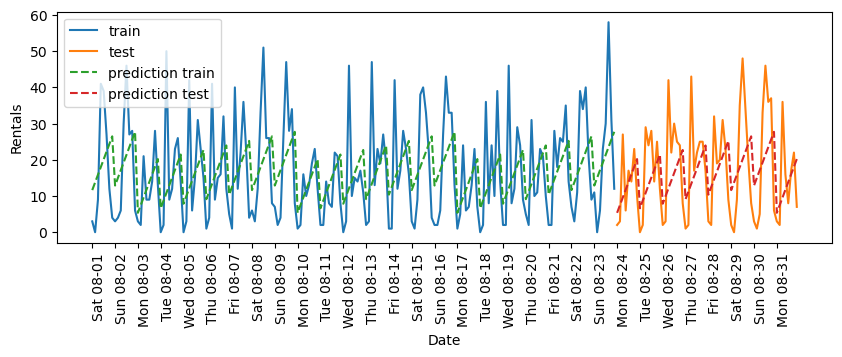

In [9]:
from sklearn.linear_model import LinearRegression

eval_on_features(X_hour_week, y, LinearRegression())

Test-set R^2: 0.62


array([[0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

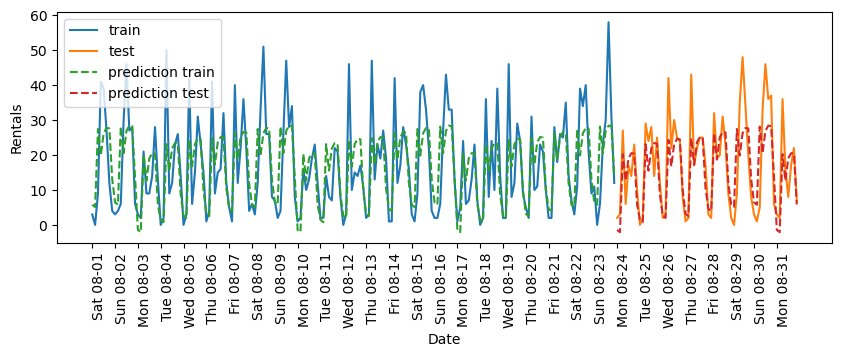

In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge

enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()
eval_on_features(X_hour_week_onehot, y, Ridge())
X_hour_week_onehot[:3]

Test-set R^2: 0.63


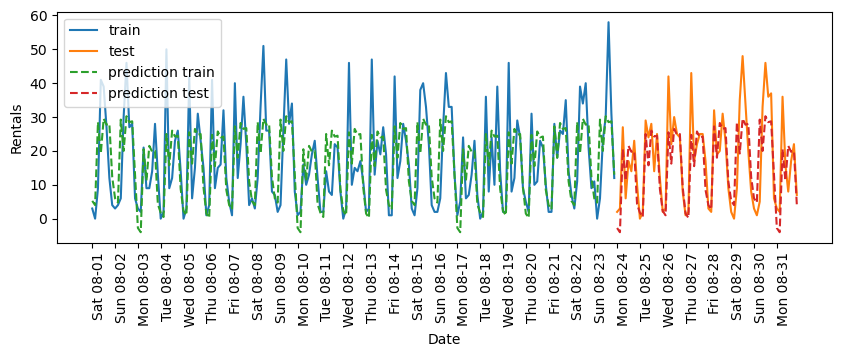

In [11]:
eval_on_features(X_hour_week_onehot, y, LinearRegression())